In [1]:
import sys

In [2]:
if sys.version_info.major == 3 and sys.version_info.minor >= 10:
    import collections
    setattr(collections, "MutableMapping", collections.abc.MutableMapping)

In [3]:
import datajoint as dj
import pandas as pd
import numpy as np
import sys

dj.config['database.host'] = 'at-database3.stanford.edu'
dj.config['database.user'] = 'pavi'
dj.config['database.password'] = 'pavi#1'

In [4]:
csrf = dj.create_virtual_module("george_csrf","george_csrf")
#events = (csrf.EyeTracePreprocessed.EyeEventsFullSession() & session_dict).fetch()
acq = dj.create_virtual_module("acq","acq")
ephys = dj.create_virtual_module("ephys","ephys")
stim = dj.create_virtual_module("stimulation", "stimulation")

[2024-11-27 02:14:56,748][INFO]: Connecting pavi@at-database3.stanford.edu:3306
[2024-11-27 02:14:56,797][INFO]: Connected pavi@at-database3.stanford.edu:3306


In [5]:
key = dict(session_start_time=3638885582960)

In [8]:
key2 = {"session_start_time" :3638885582960, }

In [9]:
stim_key = (stim.StimTrialGroup & key2).fetch1("KEY")

In [11]:
path = '/mnt/stor01' + (acq.Stimulation() & stim_key).fetch1('stim_path')

In [12]:
path

'/mnt/stor01/stimulation/Dennis/2019-04-23_12-33-19'

In [13]:
ls '/mnt/stor01/stimulation/Dennis/2019-04-23_12-33-19'

CenterSurroundExperiment.mat*  CenterSurroundExperimentSynched.mat*


In [7]:
keys = (stim.StimTrialEvents & stim_key).fetch('KEY')

In [29]:
v = (stim.StimConditions & stim_key).fetch(limit=10)

In [55]:
vals = (stim.StimConditions & stim_key).fetch('condition_info', squeeze=True)

In [135]:
acq.Stimulation & key2

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,stim_stop_time end of stimulation timestamp,stim_path path to the stimulation data,exp_type type of experiment,total_trials total number of trials completed,correct_trials number of correct trials,incorrect_trials number of incorrect trials
30,1,3638885582960,3638885599001,3638892994328,/stimulation/Dennis/2019-04-23_12-33-19,CenterSurroundExperiment,2145,528,0


In [ ]:
/mnt/stor01/stimulation/Dennis/2019-

In [ ]:
ls /mnt

In [125]:
ls '/mnt/mscratch1/stimulation/Dennis/2019-04-23_12-33-19'

ls: cannot access '/mnt/mscratch1/stimulation/Dennis/2019-04-23_12-33-19': No such file or directory


In [134]:
ls

BehaviorData0.h5*


In [111]:
stim.StimConditions() & key2

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,condition_num Condition number,condition_info Matlab structure with information on this condition,stimconditions_ts automatic timestamp. Do not edit
30,1,3638885582960,3638885599001,1,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,2,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,3,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,4,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,5,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,6,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,7,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,8,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,9,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,10,=BLOB=,2019-05-15 08:10:51


In [122]:
key2 = (acq.Stimulation & key2).fetch1('KEY')

In [123]:
acq.Subjects & key2

subject_id unique identifier for subject,subject_name name of the subject
30,Dennis


In [119]:
ls /mnt/lab/stimulation/

Andy/  Ben/  Donatello/  Hulk/  Jesse/  Testing/  Woody/


In [ ]:
ls /mnt/

In [117]:
ls /mnt/

at-export01/   dj-stor02/    md0/        scratch06/  scratch11/  stor04/
at-import01/   lab/          mscratch1/  scratch07/  scratch12/
at-publish01/  lbm0/         scratch01/  scratch08/  stor01/
at_import01/   lbm1/         scratch03/  scratch09/  stor02/
dj-stor01/     lbmscratch1/  scratch05/  scratch10/  stor03/


In [115]:
(stim.StimTrialGroup & key2).fetch1('stim_constants').dtype.fields

mappingproxy({'bgColor': (dtype('O'), 0),
              'fixSpotColor': (dtype('O'), 8),
              'fixSpotLocation': (dtype('O'), 16),
              'fixSpotSize': (dtype('O'), 24),
              'fixAcquireTime': (dtype('O'), 32),
              'fixHoldTime': (dtype('O'), 40),
              'allowSaccades': (dtype('O'), 48),
              'monitorSize': (dtype('O'), 56),
              'monitorDistance': (dtype('O'), 64),
              'monitorCenter': (dtype('O'), 72),
              'monitorType': (dtype('O'), 80),
              'passive': (dtype('O'), 88),
              'acquireFixation': (dtype('O'), 96),
              'stimulusLocation': (dtype('O'), 104),
              'imgPathPtrn': (dtype('O'), 112),
              'cacheFolder': (dtype('O'), 120),
              'texFileNumber': (dtype('O'), 128),
              'numTestTrials': (dtype('O'), 136),
              'numTrainTrials': (dtype('O'), 144),
              'numTestImagesInSeq': (dtype('O'), 152),
              'numTrainI

In [112]:
acq.Stimulation() & 

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,stim_stop_time end of stimulation timestamp,stim_path path to the stimulation data,exp_type type of experiment,total_trials total number of trials completed,correct_trials number of correct trials,incorrect_trials number of incorrect trials
0,0,3402350133088,3402350140469,3457440288047,/stimulation/Testing/2011-10-24_20-15-40,ClassDiscrimination,0,0,0
0,0,3402350639782,3402350674324,3457440288047,/stimulation/Testing/2011-10-24_20-24-34,ClassDiscrimination,0,0,0
0,0,3402350639782,3402350723012,3457440288047,/stimulation/Testing/2011-10-24_20-25-23,ClassDiscrimination,0,0,0
0,0,3402351294756,3402351314347,3457440288047,/stimulation/Testing/2011-10-24_20-35-14,ClassDiscrimination,0,0,0
0,0,3402368694028,3402368741616,3457440288047,/stimulation/Testing/2011-10-25_01-25-41,ClassDiscrimination,0,0,0
0,0,3402368694028,3402368761409,3457440288047,/stimulation/Testing/2011-10-25_01-26-01,ClassDiscrimination,0,0,0
0,0,3402368790844,3402368802018,3457440288047,/stimulation/Testing/2011-10-25_01-26-42,ClassDiscrimination,0,0,0
0,0,3402368867692,3402369014994,3457440288047,/stimulation/Testing/2011-10-25_01-30-14,ClassDiscrimination,0,0,0
0,0,3402409671623,3402409695788,3457440288047,/stimulation/Testing/2011-10-25_12-48-15,ClassDiscrimination,0,0,0
0,0,3402419901784,3402419916903,3457440288047,/stimulation/Testing/2011-10-25_15-38-36,ClassDiscrimination,0,0,0


In [109]:
(stim.StimConditions & key).fetch('condition_info')

array([rec.array([[(array([[0.]]),)]],
                 dtype=[('trial_type', 'O')]),
       rec.array([[(array([[0.]]),)]],
                 dtype=[('trial_type', 'O')]),
       rec.array([[(array([[0.]]),)]],
                 dtype=[('trial_type', 'O')]), ...,
       rec.array([[(array([[1.]]),)]],
                 dtype=[('trial_type', 'O')]),
       rec.array([[(array([[1.]]),)]],
                 dtype=[('trial_type', 'O')]),
       rec.array([[(array([[1.]]),)]],
                 dtype=[('trial_type', 'O')])], dtype=object)

In [95]:
v = (stim.StimTrialGroup & key).fetch1('stim_constants', squeeze=True)

In [105]:
v['fixSpotSize']

array(10.0, dtype=object)

In [104]:
v.dtype.fields[]

mappingproxy({'bgColor': (dtype('O'), 0),
              'fixSpotColor': (dtype('O'), 8),
              'fixSpotLocation': (dtype('O'), 16),
              'fixSpotSize': (dtype('O'), 24),
              'fixAcquireTime': (dtype('O'), 32),
              'fixHoldTime': (dtype('O'), 40),
              'allowSaccades': (dtype('O'), 48),
              'monitorSize': (dtype('O'), 56),
              'monitorDistance': (dtype('O'), 64),
              'monitorCenter': (dtype('O'), 72),
              'monitorType': (dtype('O'), 80),
              'passive': (dtype('O'), 88),
              'acquireFixation': (dtype('O'), 96),
              'stimulusLocation': (dtype('O'), 104),
              'imgPathPtrn': (dtype('O'), 112),
              'cacheFolder': (dtype('O'), 120),
              'texFileNumber': (dtype('O'), 128),
              'numTestTrials': (dtype('O'), 136),
              'numTrainTrials': (dtype('O'), 144),
              'numTestImagesInSeq': (dtype('O'), 152),
              'numTrainI

In [65]:
condition_info = np.stack([v.item()[0] for v in vals])k

In [68]:
np.unique(condition_info)

array([0., 1.])

In [84]:
tom_keys = (stim.StimTrialGroup & 'subject_id = 21').fetch('KEY')

In [87]:
stim_key = (stim.StimTrialGroup & tom_keys[30]).fetch1('KEY')

In [89]:
(stim.StimConditions & stim_key).fetch('condition_info')

array([rec.array([[(array([[1.]]), array([[1.]]))]],
                 dtype=[('targetSetup', 'O'), ('cueClass', 'O')]),
       rec.array([[(array([[2.]]), array([[1.]]))]],
                 dtype=[('targetSetup', 'O'), ('cueClass', 'O')]),
       rec.array([[(array([[1.]]), array([[2.]]))]],
                 dtype=[('targetSetup', 'O'), ('cueClass', 'O')]),
       rec.array([[(array([[2.]]), array([[2.]]))]],
                 dtype=[('targetSetup', 'O'), ('cueClass', 'O')])],
      dtype=object)

In [82]:
stim.StimTrialEvents & 'subject_id = 21'

KeyboardInterrupt: 

In [69]:
(stim.StimConditions & stim_key).fetch('')

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,condition_num Condition number,condition_info Matlab structure with information on this condition,stimconditions_ts automatic timestamp. Do not edit
30,1,3638885582960,3638885599001,1,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,2,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,3,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,4,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,5,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,6,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,7,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,8,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,9,=BLOB=,2019-05-15 08:10:51
30,1,3638885582960,3638885599001,10,=BLOB=,2019-05-15 08:10:51


In [53]:
np.stack([v[0] for v in (stim.StimConditions & stim_key).fetch('condition_info', squeeze=True)])

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [46]:
(stim.StimConditions & stim_key).fetch1??

Object `fetch1` not found.


In [48]:
stim.StimConditions.fetch?

Signature:     
stim.StimConditions.fetch(
    *attrs,
    offset=None,
    limit=None,
    order_by=None,
    format=None,
    as_dict=None,
    squeeze=False,
    download_path='.',
)
Type:           Fetch
String form:    <datajoint.fetch.Fetch object at 0x7f6aac5f3ee0>
File:           /usr/local/lib/python3.10/dist-packages/datajoint/fetch.py
Docstring:     
A fetch object that handles retrieving elements from the table expression.

:param expression: the QueryExpression object to fetch from.
Call docstring:
Fetches the expression results from the database into an np.array or list of dictionaries and
unpacks blob attributes.

:param attrs: zero or more attributes to fetch. If not provided, the call will return all attributes of this
                table. If provided, returns tuples with an entry for each attribute.
:param offset: the number of tuples to skip in the returned result
:param limit: the maximum number of tuples to return
:param order_by: a single attribute or the list o

In [24]:
stim.StimTrials & stim_key

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,trial_num Trial number,start_time Time trial trial started (in ms relative to session start),end_time Time trial trial ended (in ms relative to session start),trial_params Stimulation structure for all params,valid_trial If trial is valid or invalid,stimvalidtrials_ts automatic timestamp. Do not edit
30,1,3638885582960,3638885599001,1,81839,84092,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,2,84411,86095,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,3,86143,88337,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,4,88656,91582,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,5,91649,93771,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,6,94101,96074,=BLOB=,0,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,7,96394,97777,=BLOB=,0,2019-05-15 08:10:58
30,1,3638885582960,3638885599001,8,97825,102862,=BLOB=,0,2019-05-15 08:10:58
30,1,3638885582960,3638885599001,9,102900,104734,=BLOB=,0,2019-05-15 08:10:58
30,1,3638885582960,3638885599001,10,104782,106556,=BLOB=,0,2019-05-15 08:10:58


In [22]:
stim.StimTrialEvents() & stim_key

[2024-11-27 01:47:53,248][WARNING]: MySQL server has gone away. Reconnecting to the server.


subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,trial_num Trial number,event_type Type of stimulation event,event_time Time of stimulation event (in ms relative to start of session),event_info Miscellaneous information attached to stimulation event (in ms),stimtrialevents_ts automatic timestamp. Do not edit
30,1,3638885582960,3638885599001,1,startTrial,81839,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,showFixSpot,83130,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,acquireFixation,83341,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,showStimulus,83771,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,showSubStimulus,83771,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,showSubStimulus,83891,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,showSubStimulus,84011,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,eyeAbort,84079,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,clearScreen,84091,=BLOB=,2019-05-15 08:10:57
30,1,3638885582960,3638885599001,1,startTrialSound,83109,=BLOB=,2019-05-15 08:10:57


In [18]:
(stim.StimTrialEvents & keys[0]).fetch('event_info')

array([array([], shape=(0, 0), dtype=float64)], dtype=object)

In [9]:
key

{'subject_id': 30,
 'setup': 1,
 'session_start_time': 3638885582960,
 'stim_start_time': 3638885599001,
 'stim_constants': rec.array([[(array([[127.5],
                    [127.5],
                    [127.5]]), array([[255.],
                    [  0.],
                    [  0.]]), array([[0.],
                    [0.]]), array([[10.]]), array([[3000.]]), array([[300.]]), array([[0.]]), array([[54.6],
                    [30. ]]), array([[100.]]), array([[960.],
                    [540.]]), array(['LCD'], dtype='<U3'), array([[1.]]), array([[1.]]), array([[-310.],
                    [ 125.]]), array(['/mnt/lab/libraries/Matlab/ExperimentImages/CenterSurround/ExpImages%d.mat'],
                   dtype='<U73'), array(['/ramdisk/'], dtype='<U9'), array([[1.]]), array([[400.]]), array([[1600.]]), array([[15.]]), array([[15.]]), array([[75.]]), array([[24000.]]), array([[200.]]), array([[1600.]]), array([[120.]]), array([[0.]]), array([[300.]]), array([[0.]]), array(['Dennis'], dtype=

In [51]:
acq.EphysT0()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,ephys_start_time start session timestamp,update_ts don't edit
0,3,3753909319345,3753909357434,2022-12-14 17:06:52
0,3,3762358919758,3762358955493,2023-03-22 12:52:21
0,3,3762359757171,3762359759272,2023-03-22 12:58:51
0,3,3762360244720,3762360247401,2023-03-22 13:21:57
0,3,3779022245175,3779022258200,2023-10-01 09:53:08
0,3,3787448042763,3787448051046,2024-01-07 03:40:43
0,3,3787674726909,3787674729383,2024-01-10 00:16:18
0,3,3787756618018,3787756630198,2024-01-12 00:03:22
0,12,3733747819389,3733747824609,2022-04-25 10:59:03
0,12,3735210572686,3735210583913,2022-05-12 12:58:06


In [71]:
(stim.StimTrialGroup() & key).fetch1.__call__?

Object `fetch1.__call__` not found.


In [55]:
stim.StimTrialEvents() & key

KeyboardInterrupt: 

In [52]:
stimulation.Sti

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,tber_pulse_time pulse time
30,1,3638885582960,3638885599001,3638885664823
30,1,3638885582960,3638885599001,3638885667381
30,1,3638885582960,3638885599001,3638885669138
30,1,3638885582960,3638885599001,3638885671625
30,1,3638885582960,3638885599001,3638885674619
30,1,3638885582960,3638885599001,3638885677080
30,1,3638885582960,3638885599001,3638885679377
30,1,3638885582960,3638885599001,3638885680804
30,1,3638885582960,3638885599001,3638885685876
30,1,3638885582960,3638885599001,3638885687759


In [45]:
acq.SessionTimestamps()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,channel channel that received a message,timestamper_time real time on computer,count hardware count
0,0,3401645974530,0,3401645977491,0
0,0,3401645974530,1,3401645977522,0
0,0,3401645974530,2,3401645977525,0
0,0,3401646026598,2,3401646026619,0
0,0,3401646036331,0,3401646060797,0
0,0,3401646036331,1,3401646072778,0
0,0,3401646036331,2,3401646093471,0
0,0,3401646186693,0,3401646189699,0
0,0,3401646186693,1,3401646191392,0
0,0,3401646186693,2,3401646191400,0


In [31]:
acq

<module 'acq'>

In [5]:
ephys.Spikes()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,ephys_start_time start session timestamp,detect_method_num detection method index,sort_method_num clustering method index,unit_id The spike data,electrode_num The electrode number,spike_times The spike timing data,mean_waveform The spike waveform data,spike_file_path The file containing the spike data,multi_trigger_fraction fraction of spikes triggered multiple times
0,3,3485539760169,3485539761014,4,5,1,10,=BLOB=,=BLOB=,/processed/Testing/2014-06-13_16-29-19/2014-06-13_16-29-20/spikes/TetrodesV2/Sc10.Htt,0.00021575
0,3,3485539760169,3485539761014,4,5,2,10,=BLOB=,=BLOB=,/processed/Testing/2014-06-13_16-29-19/2014-06-13_16-29-20/spikes/TetrodesV2/Sc10.Htt,0.0
0,3,3485539760169,3485539761014,4,5,3,10,=BLOB=,=BLOB=,/processed/Testing/2014-06-13_16-29-19/2014-06-13_16-29-20/spikes/TetrodesV2/Sc10.Htt,0.000456569
1,2,3311674578000,3311680056000,1,4,1,1,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-09_13-36-18/12_09_2008_15_08_16_set01/Sc1.Htt,0.0
1,2,3311760172000,3311764653000,1,4,1,1,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-10_13-22-52/12_10_2008_14_37_43_set01/Sc1.Htt,0.0
1,2,3311760172000,3311764653000,1,4,2,10,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-10_13-22-52/12_10_2008_14_37_43_set01/Sc10.Htt,0.0
1,2,3311928263000,3311934454000,1,4,1,1,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-12_12-04-23/12_12_2008_13_47_35_set01/Sc1.Htt,0.0
1,2,3311928263000,3311934454000,1,4,2,10,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-12_12-04-23/12_12_2008_13_47_35_set01/Sc10.Htt,0.0
1,2,3312195096000,3312202247000,1,4,1,10,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-15_14-11-36/12_15_2008_16_10_22_set01/Sc10.Htt,0.0
1,2,3312274604000,3312281028000,1,4,1,1,=BLOB=,=BLOB=,/stor01/processed/Andy/2008-12-16_12-16-44/12_16_2008_14_03_47_set01/Sc1.Htt,0.0


In [111]:
csrf.EyeTracePreprocessed.EyeEventsFullSession()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,trial_num trial number,algorithm,parameter_setting,id,label,onset,offset,duration,start_time,end_time,start_x,start_y,end_x,end_y,amp,peak_vel,med_vel,avg_vel
30,3,3790954384887,3790954399618,1,remodnav,default,1,FIXA,3790950000000.0,3790950000000.0,104.0,0.0,104.0,9.51083,-19.7928,9.45834,-19.8295,0.0640834,39.9897,9.99895,10.3609
30,3,3790954384887,3790954399618,1,remodnav,default,2,SACC,3790950000000.0,3790950000000.0,130.0,104.0,234.0,9.42335,-19.782,8.55736,17.1914,36.9835,987.494,353.961,368.808
30,3,3790954384887,3790954399618,1,remodnav,default,3,HPSO,3790950000000.0,3790950000000.0,29.0,234.0,263.0,8.58386,17.1326,10.197,14.1348,3.40421,302.587,147.552,162.123
30,3,3790954384887,3790954399618,1,remodnav,default,4,FIXA,3790950000000.0,3790950000000.0,246.0,263.0,509.0,10.2045,14.0616,9.95369,12.8687,1.21891,108.773,32.3126,35.5104
30,3,3790954384887,3790954399618,1,remodnav,default,5,SACC,3790950000000.0,3790950000000.0,75.0,509.0,584.0,9.89695,12.8979,-7.89452,-7.71291,27.2276,942.656,425.856,404.542
30,3,3790954384887,3790954399618,1,remodnav,default,6,PURS,3790950000000.0,3790950000000.0,159.0,584.0,743.0,-7.88744,-7.70818,-8.49173,-8.08934,0.714457,30.2081,13.2227,13.2508
30,3,3790954384887,3790954399618,1,remodnav,default,7,FIXA,3790950000000.0,3790950000000.0,67.0,743.0,810.0,-8.49279,-8.10986,-8.54405,-8.26762,0.165881,38.7242,12.8704,15.1899
30,3,3790954384887,3790954399618,1,remodnav,default,8,SACC,3790950000000.0,3790950000000.0,44.0,810.0,854.0,-8.54564,-8.24392,-7.80721,-21.5498,13.3264,892.73,229.856,316.563
30,3,3790954384887,3790954399618,1,remodnav,default,9,FIXA,3790950000000.0,3790950000000.0,74.0,854.0,928.0,-7.80327,-21.5377,-7.68452,-22.3264,0.797612,49.6979,13.2546,15.9406
30,3,3790954384887,3790954399618,1,remodnav,default,10,SACC,3790950000000.0,3790950000000.0,59.0,928.0,987.0,-7.68952,-22.2976,-12.9616,-4.82826,18.2475,835.252,270.093,315.252


In [12]:
csrf.EyeTracePreprocessed.EyeEventsFullSession() & dict(session_start_time=3790954384887)

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,trial_num trial number,algorithm,parameter_setting,id,label,onset,offset,duration,start_time,end_time,start_x,start_y,end_x,end_y,amp,peak_vel,med_vel,avg_vel
30,3,3790954384887,3790954399618,1,remodnav,default,1,FIXA,3790950000000.0,3790950000000.0,104.0,0.0,104.0,9.51083,-19.7928,9.45834,-19.8295,0.0640834,39.9897,9.99895,10.3609
30,3,3790954384887,3790954399618,1,remodnav,default,2,SACC,3790950000000.0,3790950000000.0,130.0,104.0,234.0,9.42335,-19.782,8.55736,17.1914,36.9835,987.494,353.961,368.808
30,3,3790954384887,3790954399618,1,remodnav,default,3,HPSO,3790950000000.0,3790950000000.0,29.0,234.0,263.0,8.58386,17.1326,10.197,14.1348,3.40421,302.587,147.552,162.123
30,3,3790954384887,3790954399618,1,remodnav,default,4,FIXA,3790950000000.0,3790950000000.0,246.0,263.0,509.0,10.2045,14.0616,9.95369,12.8687,1.21891,108.773,32.3126,35.5104
30,3,3790954384887,3790954399618,1,remodnav,default,5,SACC,3790950000000.0,3790950000000.0,75.0,509.0,584.0,9.89695,12.8979,-7.89452,-7.71291,27.2276,942.656,425.856,404.542
30,3,3790954384887,3790954399618,1,remodnav,default,6,PURS,3790950000000.0,3790950000000.0,159.0,584.0,743.0,-7.88744,-7.70818,-8.49173,-8.08934,0.714457,30.2081,13.2227,13.2508
30,3,3790954384887,3790954399618,1,remodnav,default,7,FIXA,3790950000000.0,3790950000000.0,67.0,743.0,810.0,-8.49279,-8.10986,-8.54405,-8.26762,0.165881,38.7242,12.8704,15.1899
30,3,3790954384887,3790954399618,1,remodnav,default,8,SACC,3790950000000.0,3790950000000.0,44.0,810.0,854.0,-8.54564,-8.24392,-7.80721,-21.5498,13.3264,892.73,229.856,316.563
30,3,3790954384887,3790954399618,1,remodnav,default,9,FIXA,3790950000000.0,3790950000000.0,74.0,854.0,928.0,-7.80327,-21.5377,-7.68452,-22.3264,0.797612,49.6979,13.2546,15.9406
30,3,3790954384887,3790954399618,1,remodnav,default,10,SACC,3790950000000.0,3790950000000.0,59.0,928.0,987.0,-7.68952,-22.2976,-12.9616,-4.82826,18.2475,835.252,270.093,315.252


In [11]:
acq.Sessions() & csrf.EyeTracePreprocessed.EyeEventsFullSession()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,session_stop_time end of session timestamp,experimenter name of person running exp,session_path path to the data,session_datetime readable format of session start,hammer,recording_software software used to record the data
30,3,3790954384887,3790961792928,Gabby,/raw/Dennis/2024-02-16_12-53-04,2024-02-16 12:53:04,0,Acquisition2.0


In [ ]:
csrf.EyeTracePreprocessed.

In [17]:
csrf.EyeTraceFullSession()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,trial_num trial number,t0,eye_degrees,pupil_size,meta
30,3,3790954384887,3790954399618,1,14748.7,=BLOB=,=BLOB=,=BLOB=


In [20]:
dj.config["display.limit"]=50

In [63]:
acq.Sessions & csrf.EyeMovements()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,session_stop_time end of session timestamp,experimenter name of person running exp,session_path path to the data,session_datetime readable format of session start,hammer,recording_software software used to record the data
30,1,3638885582960,3638893002455,Tori,/raw/Dennis/2019-04-23_12-33-02,2019-04-23 12:33:02,0,Acquisition2.0
30,1,3638973674012,3638982377196,Tori,/raw/Dennis/2019-04-24_13-01-13,2019-04-24 13:01:14,0,Acquisition2.0
30,1,3639492658943,3639499010707,Tori,/raw/Dennis/2019-04-30_13-10-58,2019-04-30 13:10:58,0,Acquisition2.0
30,3,3790954384887,3790961792928,Gabby,/raw/Dennis/2024-02-16_12-53-04,2024-02-16 12:53:04,0,Acquisition2.0
30,3,3791216067773,3791223474548,Gabby,/raw/Dennis/2024-02-19_13-34-27,2024-02-19 13:34:27,0,Acquisition2.0
30,3,3791303340046,3791310764911,Gabby,/raw/Dennis/2024-02-20_13-48-59,2024-02-20 13:49:00,0,Acquisition2.0
30,3,3791388328061,3791395751007,Gabby,/raw/Dennis/2024-02-21_13-25-27,2024-02-21 13:25:28,0,Acquisition2.0
30,3,3791564082786,3791571539496,Gabby,/raw/Dennis/2024-02-23_14-14-42,2024-02-23 14:14:42,0,Acquisition2.0
31,1,3653578665399,3653586699133,Tori,/raw/Conan/2019-10-10_13-57-45,2019-10-10 13:57:45,0,Acquisition2.0


In [99]:
spike_times = ((ephys.Spikes & csrf.EyeMovements() )& dict(session_start_time=3638973674012,)).fetch("spike_times")

In [100]:
np.vstack(spike_times).squeeze().max() - np.vstack(spike_times).squeeze().min()

np.float64(8688184.591272362)

In [103]:
np.vstack(spike_times).squeeze().max()

np.float64(8690756.19410583)

In [101]:
acq.Sessions & (ephys.Spikes & csrf.EyeMovements() )

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,session_stop_time end of session timestamp,experimenter name of person running exp,session_path path to the data,session_datetime readable format of session start,hammer,recording_software software used to record the data
30,1,3638885582960,3638893002455,Tori,/raw/Dennis/2019-04-23_12-33-02,2019-04-23 12:33:02,0,Acquisition2.0
30,1,3638973674012,3638982377196,Tori,/raw/Dennis/2019-04-24_13-01-13,2019-04-24 13:01:14,0,Acquisition2.0
30,1,3639492658943,3639499010707,Tori,/raw/Dennis/2019-04-30_13-10-58,2019-04-30 13:10:58,0,Acquisition2.0
30,3,3790954384887,3790961792928,Gabby,/raw/Dennis/2024-02-16_12-53-04,2024-02-16 12:53:04,0,Acquisition2.0
30,3,3791216067773,3791223474548,Gabby,/raw/Dennis/2024-02-19_13-34-27,2024-02-19 13:34:27,0,Acquisition2.0
30,3,3791303340046,3791310764911,Gabby,/raw/Dennis/2024-02-20_13-48-59,2024-02-20 13:49:00,0,Acquisition2.0
30,3,3791388328061,3791395751007,Gabby,/raw/Dennis/2024-02-21_13-25-27,2024-02-21 13:25:28,0,Acquisition2.0
30,3,3791564082786,3791571539496,Gabby,/raw/Dennis/2024-02-23_14-14-42,2024-02-23 14:14:42,0,Acquisition2.0
31,1,3653578665399,3653586699133,Tori,/raw/Conan/2019-10-10_13-57-45,2019-10-10 13:57:45,0,Acquisition2.0


# eye movements

In [23]:
acq.Sessions & csrf.EyeMovements()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,session_stop_time end of session timestamp,experimenter name of person running exp,session_path path to the data,session_datetime readable format of session start,hammer,recording_software software used to record the data
30,1,3638885582960,3638893002455,Tori,/raw/Dennis/2019-04-23_12-33-02,2019-04-23 12:33:02,0,Acquisition2.0
30,1,3638973674012,3638982377196,Tori,/raw/Dennis/2019-04-24_13-01-13,2019-04-24 13:01:14,0,Acquisition2.0
30,1,3639492658943,3639499010707,Tori,/raw/Dennis/2019-04-30_13-10-58,2019-04-30 13:10:58,0,Acquisition2.0
30,3,3790954384887,3790961792928,Gabby,/raw/Dennis/2024-02-16_12-53-04,2024-02-16 12:53:04,0,Acquisition2.0
30,3,3791216067773,3791223474548,Gabby,/raw/Dennis/2024-02-19_13-34-27,2024-02-19 13:34:27,0,Acquisition2.0
30,3,3791303340046,3791310764911,Gabby,/raw/Dennis/2024-02-20_13-48-59,2024-02-20 13:49:00,0,Acquisition2.0
30,3,3791388328061,3791395751007,Gabby,/raw/Dennis/2024-02-21_13-25-27,2024-02-21 13:25:28,0,Acquisition2.0
30,3,3791564082786,3791571539496,Gabby,/raw/Dennis/2024-02-23_14-14-42,2024-02-23 14:14:42,0,Acquisition2.0
31,1,3653578665399,3653586699133,Tori,/raw/Conan/2019-10-10_13-57-45,2019-10-10 13:57:45,0,Acquisition2.0


In [54]:
eye_coords, eye_degrees, pupil_size = (csrf.EyeMovements() & dict(session_start_time=3638885582960, image_number=4)).fetch("eye_coords", "eye_degrees", "pupil_size")

In [55]:
eye_coords.shape

(528,)

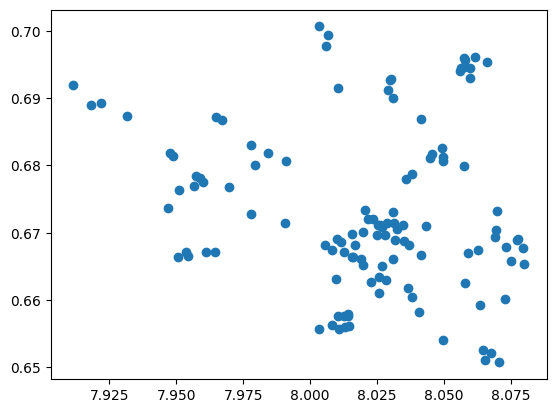

In [56]:
plt.plot(*np.stack(eye_coords[1]).T, 'o')

In [51]:
eye_coords, eye_degrees, pupil_size = (csrf.EyeMovements() & dict(session_start_time=3638885582960, image_number=1)).fetch("eye_coords", "eye_degrees", "pupil_size")

In [52]:
eye_coords.shape

(528,)

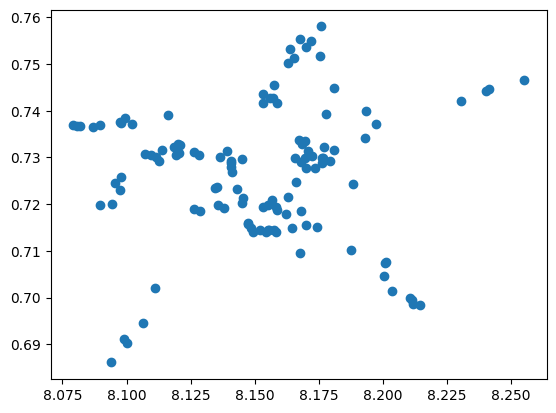

In [53]:
plt.plot(*np.stack(eye_coords[1]).T, 'o')

In [46]:
key = dict(session_start_time=3638885582960)

In [ ]:
acq.

In [35]:
acq.TberPulses()

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,tber_pulse_time pulse time
0,1,3398184067536,3398184105204,3398184116159
0,1,3398184067536,3398184105204,3398184121129
0,1,3398184067536,3398184105204,3398184125924
0,1,3398184067536,3398184105204,3398184130692
0,1,3398185136890,3398186557363,3398188132380
0,1,3398190204188,3398190422533,3398190434034
0,1,3398190204188,3398190422533,3398190438206
0,1,3398260519682,3398262428150,3398262440384
0,1,3398260519682,3398262428150,3398262507055
0,1,3398260519682,3398262755896,3398262762068


In [105]:
acq.Stimulation & key

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,stim_stop_time end of stimulation timestamp,stim_path path to the stimulation data,exp_type type of experiment,total_trials total number of trials completed,correct_trials number of correct trials,incorrect_trials number of incorrect trials
30,1,3638885582960,3638885599001,3638892994328,/stimulation/Dennis/2019-04-23_12-33-19,CenterSurroundExperiment,2145,528,0


In [27]:
acq

NameError: name 'acq' is not defined

In [106]:
(acq.BehaviorTraces() & key)

subject_id unique identifier for subject,setup setup number,session_start_time start session timestamp,stim_start_time timestamp for stimulation start,beh_start_time timestamp for recordng start,beh_stop_time end of recording timestamp,beh_path path to the behavioral data,beh_traces_type type of recording
30,1,3638885582960,3638885599001,3638885599011,3638892994853,/raw/Dennis/2019-04-23_12-33-02/2019-04-23_12-33-18/BehaviorData%d.h5,analog


In [109]:
3638885599011-3638885582960


16051

In [2]:
filename = "/mnt/mscratch1/Dennis/2019-04-23_12-33-02/2019-04-23_12-33-18/BehaviorData0.h5"

In [1]:
import datajoint as dj
import os
import h5py
import scipy.io
import numpy as np
from scipy.signal import decimate
import pandas as pd

In [9]:
filename = '/mnt/mscratch1/Dennis/2019-04-23_12-33-02/2019-04-23_12-33-18/BehaviorData%d.h5'

In [13]:
br = BaseReaderElectrophysiology(filename, )

In [14]:
reader

In [15]:
eh = np.array(br.match_channels('Eye Horizontal').tolist())


i did my job


In [20]:
from matplotlib import pyplot as plt

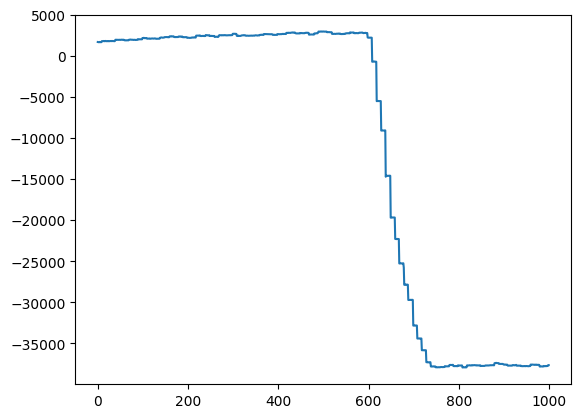

In [21]:

plt.plot(eh[:1000])

In [26]:
br.fp.attrs["channelNames"]

np.bytes_(b'Eye Horizontal,Eye Vertical,Photodiode,PupilSizeIn\r\n')

In [3]:
import h5py
import numpy as np

class BaseReaderElectrophysiology:
    def __init__(self, file_name, channels=None):
        self.file_name = file_name
        self.fp = h5py.File(file_name, 'r',  driver='family',memb_size=2147483648)
        sz = self.fp['data'].shape
        self.nb_channels = sz[0]
        self.nb_samples = sz[1]
        self.ch_names = self.fp.attrs['channelNames'].decode('UTF-8').strip().split(',')
        self.Fs = self.fp.attrs['Fs']
        self.t0 = self.fp.attrs.get('t0', 0)
        self.scale = self.fp.attrs['scale']
        #self.eh = self.fp['data'][0][:]
        #self.ev = self.fp['data'][1][:]
        #self.ps = self.fp['data'][3][:]

        

    def match_channels(self, channel):
       
        if not (isinstance(channel, str)):
            raise ValueError('channel name must be a string')
        
        if not (channel in self.ch_names):
            raise KeyError('channel name not valid. Channel name can only be one of Eye Horizontal, Eye Vertical, Photodiode, PupilSizeIn')
    

        ch_index = self.ch_names.index(channel)
        ch_data = self.fp['data'][ch_index][:]
        print('i did my job')
        
        return ch_data
    
    def get_sample_index(self, t):
        # Returns the sample indices 'idx' for the vector of timestamps 't'.

        #print("the value of t0 is ", self.t0)
        if not (self.t0 > 0):
            raise ValueError('t0 has not been updated in this file!')
        
        idx = np.round(1e-3 * (t - self.t0) * self.Fs) + 1
        idx[idx < 1] = np.nan
        idx[idx > self.nb_samples] = np.nan
        return idx